## Regression Models

### 1. Import libraries

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline

### 2. Linear Regression

#### 2.1 import files

In [49]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-10-25 06:43:27--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2020-10-25 06:43:27 (1.79 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [50]:
df = pd.read_csv("FuelConsumption.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### 2.2 Simple Linear Regression Model

In [51]:
sx= df[['ENGINESIZE']]
sy= df[['CO2EMISSIONS']]

# training with scikit learn train_test_split
from sklearn.model_selection import train_test_split

sx_train, sx_test, sy_train, sy_test = train_test_split(sx, sy, test_size=0.2, random_state=42)

print("number of training sample is", sx_train.shape[0])
print("number of test sample is", sx_test.shape[0])

from sklearn.linear_model import LinearRegression

srm = LinearRegression()

srm.fit(sx_train, sy_train)

print('The intercept is ', srm.intercept_)
print('The coefficients are ', srm.coef_)
print('The model r^2 score is %.2f' % srm.score(sx_test, sy_test)) 

number of training sample is 853
number of test sample is 214
The intercept is  [126.28970217]
The coefficients are  [[38.99297872]]
The model r^2 score is 0.76


Text(0, 0.5, 'Emissions')

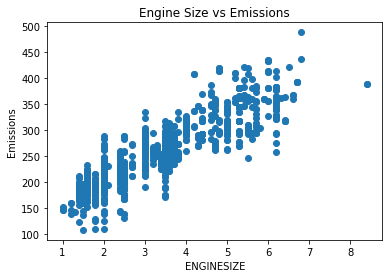

In [52]:
plt.scatter(sx,sy)
plt.title('Engine Size vs Emissions')
plt.xlabel('ENGINESIZE')
plt.ylabel('Emissions')

#### 2.3 Multiple Linear Regression Model 

In [7]:
x= df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]
y= df[['CO2EMISSIONS']]

# training with scikit learn train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("number of training sample is", x_train.shape[0])
print("number of test sample is", x_test.shape[0])

from sklearn.linear_model import LinearRegression

mrm = LinearRegression()

mrm.fit(x_train, y_train)

print('The intercept is ', mrm.intercept_)
print('The coefficients are ', mrm.coef_)
print('The model r^2 score is %.2f' % mrm.score(x_test, y_test)) 

number of training sample is 853
number of test sample is 214
The intercept is  [67.82714884]
The coefficients are  [[11.23567565  7.0089373   5.59604353  3.81386072]]
The model r^2 score is 0.88


#### 2.4 Logistic Regression Model, gradient descent

In [4]:
# downlaod file

!wget -O ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

--2020-10-25 06:21:10--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36144 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.30K  --.-KB/s    in 0.02s   

2020-10-25 06:21:10 (1.79 MB/s) - ‘ChurnData.csv’ saved [36144/36144]



In [5]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [6]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [32]:
# set X Y values, scale/fit/transform X, train/test split
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

y = np.asarray(churn_df['churn'])
y [0:5]

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [47]:
# train model
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

yhat = LR.predict(X_test)
print('first 5 predicted y: \n', yhat[0:5])
yhat_prob = LR.predict_proba(X_test)
print('first 5 class=1, class=0 probabilities: \n', yhat_prob[0:5])

first 5 predicted y: 
 [0 0 0 0 0]
first 5 class=1, class=0 probabilities: 
 [[0.54132919 0.45867081]
 [0.60593357 0.39406643]
 [0.56277713 0.43722287]
 [0.63432489 0.36567511]
 [0.56431839 0.43568161]]


In [48]:
# classification model evaluation methods
from sklearn.metrics import jaccard_similarity_score, log_loss, classification_report

print('Jaccard score: ', jaccard_similarity_score(y_test, yhat))
print('Log loss: %.2f'% log_loss(y_test,yhat_prob))
print('Classification report: \n', classification_report(y_test, yhat))

Jaccard score:  0.75
Log loss: 0.60
Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

   micro avg       0.75      0.75      0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



### 3. Non-Linear Regression

#### 3.1 Simple non-linear regression model

##### 3.1.1 polynomial features degree = 2

In [25]:
x = cdf[['ENGINESIZE']]
y = cdf[['CO2EMISSIONS']]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

from sklearn.linear_model import LinearRegression

plr = LinearRegression()
yhat_train = plr.fit(x_train_poly, y_train)
print ('Coefficients: ', plr.coef_)
print ('Intercept: ', plr.intercept_)
print('R^2: ', plr.score(x_test_poly, y_test))

Coefficients:  [[ 0.         47.42976379 -1.12705382]]
Intercept:  [112.92021963]
R^2:  0.7676219471812655


##### 3.1.2 polynomial features degree = 3

In [27]:
x = cdf[['ENGINESIZE']]
y = cdf[['CO2EMISSIONS']]

from sklearn.model_selection import train_test_split

x3_train, x3_test, y3_train, y3_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import PolynomialFeatures

poly3 = PolynomialFeatures(degree=3)
x3_train_poly = poly3.fit_transform(x3_train)
x3_test_poly = poly3.fit_transform(x3_test)

from sklearn.linear_model import LinearRegression

plr3 = LinearRegression()
yhat_train = plr3.fit(x3_train_poly, y3_train)
print ('Coefficients: ', plr3.coef_)
print ('Intercept: ', plr3.intercept_)
print('R^2: ', plr3.score(x3_test_poly, y3_test))

Coefficients:  [[ 0.         29.92154206  3.7724906  -0.41363227]]
Intercept:  [131.29858492]
R^2:  0.7701245696899558


#### 3.2 Logistic model

##### 3.2.1 Plotting sigmoidal function to a data set

In [4]:
import numpy as np
import pandas as pd

#downloading dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head()

2020-10-23 08:09:03 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [8]:
# define x, y
x_data, y_data = (df["Year"].values, df["Value"].values)

# normalize data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

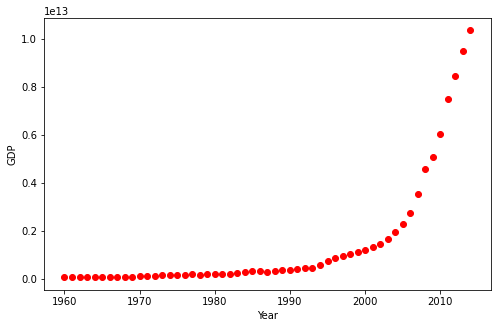

In [9]:
# plot
plt.figure(figsize=(8,5))
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [10]:
# define equation
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [42]:
# split x, y for train/ test model
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xdata,ydata,test_size=0.2, random_state=42)

# find optimized curve to fit data
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, x_train, y_train)
print('betas are ', popt[0], popt[1])

yhat = sigmoid(x_test, *popt)

# model evaluation with r^2
from sklearn.metrics import r2_score
print('r^2 is ', r2_score(y_test, yhat))


betas are  716.3579655994376 0.9972008461009108
r^2 is  0.9787577801372083


Text(0.5, 1.0, 'China GDP over year')

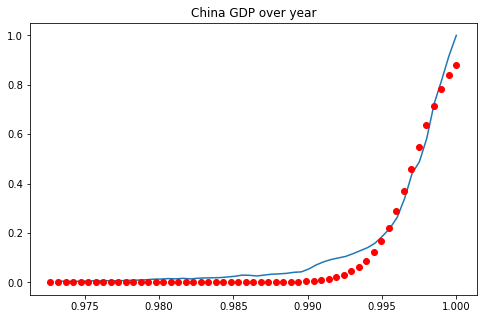

In [44]:
#plot fit line with data
x = np.linspace(1960, 2015, 55)
nx = x/max(x)
y = sigmoid(nx, *popt)

plt.figure(figsize=(8,5))
plt.plot(xdata, ydata, label='data')
plt.plot(nx,y,'ro',label='fit')
plt.title('China GDP over year')